In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [2]:
import matplotlib as mpl

In [3]:
import vehicleDetection

/home/tsbertalan/.virtualenvs/carnd/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from importlib import reload

In [5]:
import vehicleDetection.drawing
reload(vehicleDetection.drawing)

<module 'vehicleDetection.drawing' from '/mnt/wdblue/Dropbox/Projects/Vehicle Detection/vehicleDetection/drawing.py'>

In [6]:
import vehicleDetection.temporal
reload(vehicleDetection.temporal)

<module 'vehicleDetection.temporal' from '/mnt/wdblue/Dropbox/Projects/Vehicle Detection/vehicleDetection/temporal.py'>

# Load and look at the training data.

In [7]:
images, classes = vehicleDetection.data.getData(numLighter=0, numFlip=0)
imageWindows = images
windowClasses = classes

HBox(children=(IntProgress(value=0, max=6726), HTML(value='')))

Prototype an efficient pyramid of HOG features.

In [8]:
featurize = vehicleDetection.features.FeatureExtractor()

In [9]:
frame = vehicleDetection.data.readImage('test_images/test1.jpg')

In [10]:
feature_image = featurize.getChannels(frame)
from skimage.feature import hog

In [11]:
window = images[-1]

In [12]:
featurize.windowFeatures(
    feature_image
)[0].shape

(280, 7, 7, 2, 2, 9, 3)

In [13]:
self = featurize

In [14]:
allHogWindows, allColorWindows, allWindowLocations = self.windowFeatures(
    window, scales=[(1, (64, 0), 0)]
)

In [15]:
featurize(window, window=True).shape

(8364,)

In [16]:
windowFeatures, windowLocations = featurize(frame, window=False)
len(windowFeatures), set([wf.shape for wf in windowFeatures])

(280, {(8364,)})

In [17]:
%%time
blockWindows, sliceWindows, windowLocations, hogVisualizations = vehicleDetection.features.breakIntoWindows(
    feature_image[:, :, 1], visualize=True
)

CPU times: user 2.4 s, sys: 8 ms, total: 2.41 s
Wall time: 2.4 s


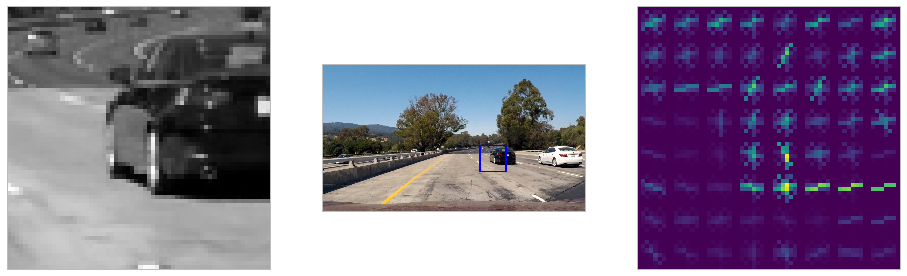

In [18]:
i = 12
im = sliceWindows[i]
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16,9), ncols=3)
ax1.imshow(im, cmap='gray')
ax2.imshow(vehicleDetection.drawing.drawBboxes(frame, [windowLocations[i]]))
ax3.imshow(hogVisualizations[i])
for a in ax1, ax2, ax3:
    a.set_xticks([]); a.set_yticks([])